<a href="https://colab.research.google.com/github/mithunglares/MobileAppUseCase/blob/main/Banking_MobileAppGooglePlayReiewsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Step 1: Install the Pre-Required Modules***

In [ ]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 983 kB/s 
  Created wheel for google-play-scraper: filename=google_play_scraper-1.1.0-py3-none-any.whl size=24585 sha256=70918f2aa8a0162e27471eff43f408bc6373439594c8257930d847675ff1abbd
  Stored in directory: /root/.cache/pip/wheels/f4/fc/13/fc4c30a74f33bdd956248d2a0f022780fce59250a6a2301ad8
Successfully built google-play-scraper


# ***Step 2: Import the required Modules***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all, reviews

# ***Step 3: Connecting to Google Play Store to pull comments from Users who gave Single * Rating***

1. Please note "com.bigbasket.mobileapp" is the id configured for Big Basket in this case. 
   You will need to have the respective Application ID configured based on your interest
2. ID can be obtained from Google Play Store, for Eg: "https://play.google.com/store/apps/details?id=com.bigbasket.mobileapp&hl=en-US"

In [ ]:
result,continuation_token = reviews(
    'com.citi.citimobile',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=10000,# defaults to 100
    filter_score_with=1
    )
result, _ = reviews(
    'com.citi.citimobile',
    continuation_token= continuation_token# defaults to None(load from the beginning)
)

# ***Step 4: Analysing the data, please execute to understand the DataFrame structure***

In [ ]:
df = pd.DataFrame.from_records(result)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              10000 non-null  object        
 1   userName              10000 non-null  object        
 2   userImage             10000 non-null  object        
 3   content               9976 non-null   object        
 4   score                 10000 non-null  int64         
 5   thumbsUpCount         10000 non-null  int64         
 6   reviewCreatedVersion  8773 non-null   object        
 7   at                    10000 non-null  datetime64[ns]
 8   replyContent          3564 non-null   object        
 9   repliedAt             3564 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 781.4+ KB


## ***Step 5: Processing the Score for last 10,000 records of 1 star rating***

Analysis For Rating of 1 Star
crash:758.0
slowness:431.0
not responding:18.0
errors:802.0
payment issues:833.0
failed transactions:153.0
funds transactions:26.0
statement download issues:94.0
transfer transactions:131.0
upi issues:1.0
Total Count=10000 and Other Issues:6753.0


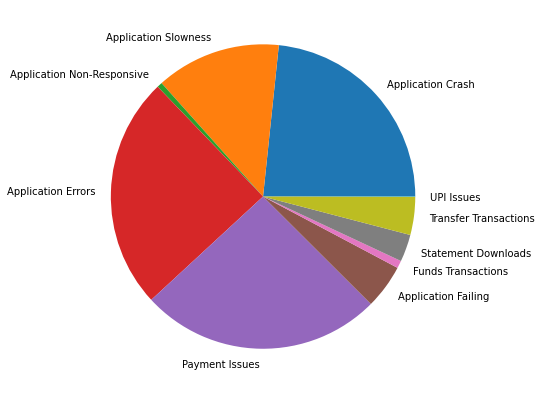

In [ ]:
#df.info()
#df.head()
#print(df['score'].value_counts())
#df['score'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%')
total_count1=len(df)
crash_count1=(df["content"].str.count('crash').sum())
slow_count1=(df["content"].str.count('slow').sum())
not_responding1=(df["content"].str.count('responding').sum())
error_count1=(df["content"].str.count('error').sum())
payment_count1=(df["content"].str.count('payment').sum())
fail_count1=(df["content"].str.count('fail').sum())
funds_count1=(df["content"].str.count('fund').sum())
statement_count1=(df["content"].str.count('statement').sum())
transfer_count1=(df["content"].str.count('transfer').sum())
upi_count1=(df["content"].str.count('UPI').sum())
issues=['Application Crash', 'Application Slowness', 'Application Non-Responsive', 'Application Errors', 'Payment Issues', 'Application Failing','Funds Transactions','Statement Downloads','Transfer Transactions','UPI Issues']
data1=[crash_count1,slow_count1,not_responding1,error_count1,payment_count1,fail_count1,funds_count1,statement_count1,transfer_count1,upi_count1]
Sum1=sum(data1)


others1=total_count1-Sum1
print("Analysis For Rating of 1 Star")
print("crash:{}".format(crash_count1))
print("slowness:{}".format(slow_count1))
print("not responding:{}".format(not_responding1))
print("errors:{}".format(error_count1))
print("payment issues:{}".format(payment_count1))
print("failed transactions:{}".format(fail_count1))

print("funds transactions:{}".format(funds_count1))
print("statement download issues:{}".format(statement_count1))
print("transfer transactions:{}".format(transfer_count1))
print("upi issues:{}".format(upi_count1))
print("Total Count={} and Other Issues:{}".format(total_count1,others1))




fig = plt.figure(figsize =(10, 7))
plt.pie(data1, labels = issues)
plt.show()

In [ ]:
for cnt, i in enumerate(result):
  print ("{} : {} : {} : {}".format(cnt,i['score'],i['content'],i['at']))


Streaming output truncated to the last 5000 lines.
5000 : 1 : Citi requires access to my files. Uninstall! : 2017-11-23 16:37:01
5001 : 1 : App isn't working... Again... : 2017-11-23 14:35:59
5002 : 1 : I keep trying to deposit my check and it keeps saying its having some problems. Always always does this : 2017-11-23 12:12:20
5003 : 1 : Only banking app I have that only let's you use finger print login if you have the phone set to locked as well. Makes no sense if my finger can open my phone than log into the app what difference does it make if I lock my phone or not : 2017-11-23 02:06:30
5004 : 1 : Worst update ever! Cannt do mobile deposit at all because of the stupid automatic image capture. The app keeps denying my images and I have zero way to take control and decide how i want to take pictures. So STUPID!!!! : 2017-11-23 00:39:48
5005 : 1 : Everytime I try to sign in I get an error message.  I have to uninstall then reinstall just to log in one time.  This has been going on for 

## ***Step 6: Processing the score for last 5,000 records of 2 star rating***

In [ ]:
result2,continuation_token2 = reviews(
    'com.citi.citimobile',
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.NEWEST
    count=2000,# defaults to 100
    filter_score_with=2
    )
result2, _ = reviews(
    'com.citi.citimobile',
    continuation_token=continuation_token2 # defaults to None(load from the beginning)
)

df2 = pd.DataFrame.from_records(result2)

In [ ]:
for cnt, i in enumerate(result2):
  print ("{} : {} : {} : {}".format(cnt,i['score'],i['content'],i['at']))


0 : 2 : updated app, at first it was faster and seemed to work great. Until it kept telling me something went wrong with my login, I've had to reset many times and it's a pain. They need to fix : 2019-07-23 18:09:00
1 : 2 : Always glitchy. I set the fingerprint up every time and every time I have to do it again. I often have to uninstall the app and reinstall it as well. : 2019-07-23 03:46:10
2 : 2 : it is Great when it works correctly , which is rare. : 2019-07-22 20:06:10
3 : 2 : Too many technical issues. I can't even check my account sometimes because of this issue. It's so bad that I'm considering switching to a completely different bank. : 2019-07-22 17:31:07
4 : 2 : since last update in July 2019 i cant pay bills : 2019-07-22 14:29:25
5 : 2 : in one word, inconsistent. it keeps resetting when i try to make a transfer. : 2019-07-22 13:09:07
6 : 2 : app is good but login is so buggy. it will work once and then wont login it again. I have it set to use fingerprints, for the first t

Analysis For Rating of 2 Star
crash:193
slowness:112
not responding:3
errors:191
payment issues:256
failed transactions:39
funds transactions:191
statement download issues:256
transfer transactions:39
upi issues:0
Total Count=2000 and Other Issues:1103


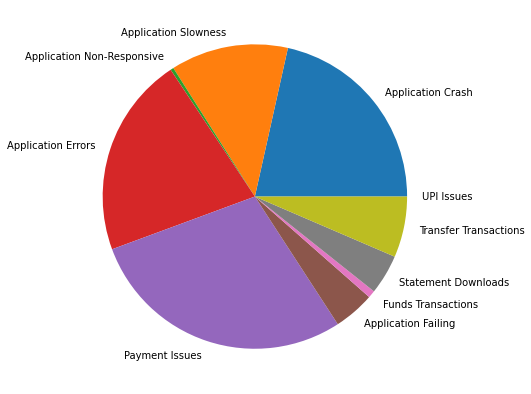

In [ ]:
total_count2=len(df2)
crash_count2=(df2["content"].str.count('crash').sum())
slow_count2=(df2["content"].str.count('slow').sum())
not_responding2=(df2["content"].str.count('responding').sum())
error_count2=(df2["content"].str.count('error').sum())
payment_count2=(df2["content"].str.count('payment').sum())
#payment_count2=0
fail_count2=(df2["content"].str.count('fail').sum())
funds_count2=(df2["content"].str.count('fund').sum())
statement_count2=(df2["content"].str.count('statement').sum())
transfer_count2=(df2["content"].str.count('transfer').sum())
upi_count2=(df2["content"].str.count('UPI').sum())
data2=[crash_count2,slow_count2,not_responding2,error_count2,payment_count2,fail_count2,funds_count2,statement_count2,transfer_count2,upi_count2]

Sum2=sum(data2)
others2=total_count2-Sum2
print("Analysis For Rating of 2 Star")
print("crash:{}".format(crash_count2))
print("slowness:{}".format(slow_count2))
print("not responding:{}".format(not_responding2))
print("errors:{}".format(error_count2))
print("payment issues:{}".format(payment_count2))
print("failed transactions:{}".format(fail_count2))
print("funds transactions:{}".format(error_count2))
print("statement download issues:{}".format(payment_count2))
print("transfer transactions:{}".format(fail_count2))
print("upi issues:{}".format(upi_count2))

print("Total Count={} and Other Issues:{}".format(total_count2,others2))


fig2 = plt.figure(figsize =(10, 7))
plt.pie(data2, labels = issues)
 
# show plot
plt.show()

In [ ]:
#pip install azure-ai-textanalytics

### ***SENTIMENT ANALYSIS***

In [ ]:
#import azure 
#from azure.ai.textanalytics import TextAnalyticsClient
#from azure.core.credentials import AzureKeyCredential

###SIMPLE SCRIPT TO DOWNLOAD REVIEWS FROM GOOGLE PLAY FOR ANY APPLICATION